# FastAI

## Vision Learner

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_dog(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_dog,
    item_tfms=Resize(224))

learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.176158,0.015439,0.004736,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.057238,0.022355,0.006089,00:28


In [2]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [3]:
img = PILImage.create(uploader.data[0])
is_dog,_,probs = learner.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: False.
Probability it's a dog: 0.007782


## UNet Learner

In [4]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, 
    bs=8, 
    fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learner = unet_learner(dls, resnet34)
learner.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.643441,2.441657,00:02


epoch,train_loss,valid_loss,time
0,1.904691,1.515789,00:02
1,1.685458,1.511199,00:02
2,1.517933,1.129068,00:02
3,1.392548,1.059645,00:02
4,1.244945,0.877321,00:02
5,1.112974,0.858785,00:02
6,1.009289,0.846915,00:02
7,0.926702,0.841827,00:02


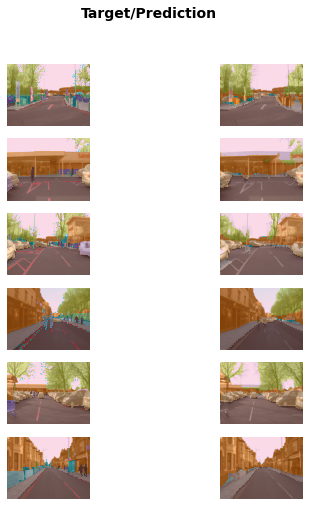

In [5]:
learner.show_results(max_n=6, figsize=(7,8))

## Text Classifier

In [6]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learner.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.459480,0.395442,0.822320,02:48


epoch,train_loss,valid_loss,accuracy,time
0,0.307024,0.240964,0.904920,05:25
1,0.238715,0.214831,0.917760,05:25
2,0.195626,0.191704,0.927280,05:25
3,0.145426,0.194434,0.928760,05:25


In [7]:
learner.predict("I really liked that movie!")

('pos', tensor(1), tensor([8.2007e-04, 9.9918e-01]))

## Tabular Learner

In [8]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(
    path/'adult.csv', 
    path=path, 
    y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learner = tabular_learner(dls, metrics=accuracy)

In [9]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.379762,0.358519,0.832924,00:04
1,0.370551,0.351210,0.836763,00:05
2,0.353951,0.344861,0.839988,00:05


## Collab Learner

In [10]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)

dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learner = collab_learner(dls, y_range=(0.5,5.5))
learner.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.511171,1.436871,00:00


epoch,train_loss,valid_loss,time
0,1.366867,1.374979,00:00
1,1.258322,1.184228,00:00
2,1.007732,0.874052,00:00
3,0.796017,0.736019,00:00
4,0.686558,0.704918,00:00
5,0.644250,0.694940,00:00
6,0.628407,0.690004,00:00
7,0.616831,0.688198,00:00
8,0.605131,0.687274,00:00
9,0.605405,0.687240,00:00


In [11]:
learner.show_results()

,userId,movieId,rating,rating_pred
0,83.0,15.0,5.0,3.965071
1,56.0,73.0,2.0,4.355430
2,82.0,84.0,4.0,3.857208
3,29.0,19.0,1.0,2.636082
4,53.0,38.0,4.0,4.619443
5,56.0,97.0,4.5,4.203892
6,68.0,25.0,2.0,3.601379
7,99.0,27.0,3.5,3.929182
8,89.0,41.0,3.5,4.260345
